# KNN Classification

In [1]:
import numpy as np
import pandas as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df=pd.read_excel("C:\\Users\\chara\\Downloads\\dataR2.xlsx")
print("Shape: ",df.shape)
print("Features: ",df.iloc[:,0:9])
print("Output: ",df.iloc[:,9])

Shape:  (116, 10)
Features:       Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554.

In [18]:
print(df.iloc[0,0:9])
print(df.iloc[0,9])

Age             48.000000
BMI             23.500000
Glucose         70.000000
Insulin          2.707000
HOMA             0.467409
Leptin           8.807100
Adiponectin      9.702400
Resistin         7.995850
MCP.1          417.114000
Name: 0, dtype: float64
1


In [19]:
print(df.shape)

(116, 10)


In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:9],df.iloc[:,9],test_size=0.2)

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
df1=pd.DataFrame(X_train)
df2=pd.DataFrame(X_test)
res=pd.concat([df1,df2],axis=1)
print(res)

      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0    48.0  23.500000     70.0    2.707  0.467409   8.8071     9.702400   
1    83.0  20.690495     92.0    3.115  0.706897   8.8438     5.429285   
2    82.0  23.124670     91.0    4.498  1.009651  17.9393    22.432040   
3    68.0  21.367521     77.0    3.226  0.612725   9.8827     7.169560   
4    86.0  21.111111     92.0    3.549  0.805386   6.6994     4.819240   
..    ...        ...      ...      ...       ...      ...          ...   
111  45.0  26.850000     92.0    3.330  0.755688  54.6800    12.100000   
112   NaN        NaN      NaN      NaN       NaN      NaN          NaN   
113  65.0  32.050000     97.0    5.730  1.370998  61.4800    22.540000   
114  72.0  25.590000     82.0    2.820  0.570392  24.9600    33.750000   
115  86.0  27.180000    138.0   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1   Age    BMI  Glucose  Insulin    HOMA  Leptin  \
0     7.99585  417.114   NaN    NaN   

In [159]:
df3=pd.DataFrame(y_train)

In [160]:
Clusters=[]
Accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    Clusters.append(i)
    Accuracy.append(metrics.accuracy_score(y_test,y_pred))
print(Clusters)
print(Accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.5416666666666666, 0.4166666666666667, 0.4166666666666667, 0.4583333333333333, 0.5833333333333334, 0.625, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.625, 0.5833333333333334, 0.5833333333333334, 0.4583333333333333, 0.5, 0.5416666666666666, 0.5416666666666666, 0.5833333333333334, 0.5416666666666666, 0.5833333333333334]


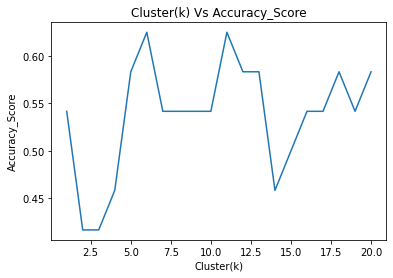

In [161]:
plt.title("Cluster(k) Vs Accuracy_Score")
plt.xlabel("Cluster(k)")
plt.ylabel("Accuracy_Score")
plt.plot(Clusters,Accuracy)
plt.show()